# ATD2022 Challenge

## Summary

In the ATD2022 challenge, you will create a multivariate time series forecaster capable of predicting national-level geopolitical event counts.

The [GDELT project](https://www.gdeltproject.org/) monitors print, broadcast, and web media to record events and attribute them to organizations or state-actors using the [CAMEO coding system](http://data.gdeltproject.org/documentation/CAMEO.Manual.1.1b3.pdf). A subset of the events considered by the dataset include instances of "protests", "threats", "providing aid", "engaging in diplomatic cooperation", and "assaults".

In this challenge, we consider a weekly-aggregated, national-level view of the GDELT dataset. You will create multivariate time series forecasters that, given past observations of event counts for all countries in the dataset, predicts the number of events for each event type and for each country for the following $k$ weeks. Models will be evaluated by backtesting the model on historical data, evaluated using standard time series metrics, and compared against baseline algorithms as well as the algorithms of your challenge peers.

## Problem Statement

In more formal mathematical language, consider a set of $m$ countries and $n$ event root codes. Let $X_{t_i} \in \mathbb{Z}_{+}^{m \times n}$ be the *state of the world* at time $t_i$, where $X_{t_i}[a,b]$ is the number of events of type $b$ for country $a$ at time $t_i$.

Further, let $T_{0, k} = (X_{t_0}, \ldots, X_{t_k})$ be the uniformly sampled time series of the state of the world at times $t_0, \ldots, t_k$.

Participants will produce a forecast function $f$ which, given the time series of observations $T_{0, k}$ will predict the next four states of the world at times $t_{k+1}, \ldots t_{k+4}$. Namely, $f: T_{0, k} \rightarrow T_{k+1, k+4}$.

## Background

For an excellent resource on forecasting best practices, we recommend [Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on April 22, 2022](https://otexts.com/fpp3/).

## Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
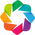

In [1]:
import warnings

import holoviews as hv
import pandas as pd
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

import atd2022

hv.extension("bokeh")

warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.simplefilter(
    action="ignore", category=atd2022.forecasters.UnsupportedPastCovariatesWarning
)

# Read Data

We can read in the `atd2022` public dataset by using the `atd2022.io.read_csv()` function.

As described above, this dataset is based on the GDELT dataset. We focus our attention on national, weekly counts of the most general level of events.

The dataset begins in the week spanning `2013-12-30/2014-01-05` and ends in the week spanning `2018-02-05/2018-02-11`, a period of 215 weeks.

Observations from 261 countries are included in the dataset. Countries are concisely encoded using the two-digit [FIPS coding scheme](https://en.wikipedia.org/wiki/List_of_FIPS_country_codes). You can find a dataframe encoding this mapping in `atd2022.cameo.Cameo.countries`.

Further, the dataset considers the twenty, top-level event root codes. A table summarizing the events is shown below (and can be programmatically retrieved using `atd2022.cameo.Cameo.events`).

|   CAMEOEVENTCODE | EVENTDESCRIPTION                 |
|-----------------:|:---------------------------------|
|               01 | MAKE PUBLIC STATEMENT            |
|               02 | APPEAL                           |
|               03 | EXPRESS INTENT TO COOPERATE      |
|               04 | CONSULT                          |
|               05 | ENGAGE IN DIPLOMATIC COOPERATION |
|               06 | ENGAGE IN MATERIAL COOPERATION   |
|               07 | PROVIDE AID                      |
|               08 | YIELD                            |
|               09 | INVESTIGATE                      |
|               10 | DEMAND                           |
|               11 | DISAPPROVE                       |
|               12 | REJECT                           |
|               13 | THREATEN                         |
|               14 | PROTEST                          |
|               15 | EXHIBIT FORCE POSTURE            |
|               16 | REDUCE RELATIONS                 |
|               17 | COERCE                           |
|               18 | ASSAULT                          |
|               19 | FIGHT                            |
|               20 | USE UNCONVENTIONAL MASS VIOLENCE |

In [2]:
truth = atd2022.io.read_csv()
truth.head()

Region                AA                                 ...   ZI              \
Event                 01 02  03  04 05   06 07 08 09 10  ...   11  12  13  14   
2013-12-30/2014-01-05  0  0   0   6  0    0  0  0  0  0  ...   97  25  15   1   
2014-01-06/2014-01-12  2  0   0  11  0    1  0  0  0  0  ...  204  64  29  41   
2014-01-13/2014-01-19  0  1   3   7  1    0  0  0  0  0  ...  164  49  20   8   
2014-01-20/2014-01-26  0  1   0   4  0    0  0  2  0  0  ...   58  26  10   1   
2014-01-27/2014-02-02  6  1  59   3  0  103  0  4  0  0  ...  227  67  42  45   

Region                                          
Event                  15  16   17  18   19 20  
2013-12-30/2014-01-05  13   6   90  25   51  1  
2014-01-06/2014-01-12  16  22  174  56  118  0  
2014-01-13/2014-01-19   0  34   91  20   63  0  
2014-01-20/2014-01-26   3   8   47  16   22  0  
2014-01-27/2014-02-02   0  19  169  47   69  0  

[5 rows x 5200 columns]

# Explore the data

We can interactively explore the ground truth dataset. On the far right of the cell below, we see two drop-down menus which allow us to select the timeseries corresponding to a particular `region` and `event` pair. Further, on the right edge of the plot, there are handful of tools for panning, box-zooming, mouse-wheel zooming, saving the current view of the figure, or resetting the plot axes.

**Note:** This visualization's interactive features require that either:
1. You launch the notebook using the classic, `Jupyter Notebook` viewer (rather than `Jupyter Lab`).
2. If using `Jupyter Lab`, you must ensure that you launch the `Jupyter Lab` from your `atd2022` conda environment (which will have the necessary `pyviz_comms` package installed to support the interactive widgets).

In [3]:
atd2022.viz.plot_series_panel({"Truth": truth})

Row(sizing_mode='stretch_width')
    [0] HSpacer()
    [1] HoloViews(DynamicMap, center=True, height=400, sizing_mode='fixed', widget_location='right', width=650)
    [2] HSpacer()
    [3] WidgetBox(align=('end', 'center'))
        [0] Select(name='Region', options=['Aruba', 'Antigua and Bar...], value='Aruba')
        [1] Select(name='Event', options=['MAKE PUBLIC STATEMENT', ...], value='MAKE PUBLIC STATEMENT')

# Generate historical forecasts for several baseline models

*Backtesting* is a methodology for evaluating the performance of prediction models on historic data. The task of time series forecasting is particularly sensitive to maintaining proper seperation between "past" training data and "future" prediction queries (after all-- future observations are the answers to past prediction queries). To achieve this separation, we use the `atd2022.backtest.Splitter` to handle temporally iterating through our dataset and yielding the appropriate train/test split at a given point in time. The `atd2022.backtest.Splitter` implements a sliding or expanding window (in this challenge, we will use an expanding window), allowing the user to set a gap between the training and testing set in each window, the size of the training and testing windows, and how far to slide forward each time a new window is generated. During backtesting, we pretend that we only know what occurred in the training set and that the testing set is unknown data, and for each window generate a forecast on the testing set using only the data in the training set. This allows us to emulate the experience of predicting "the future" on data that has already occured, and allows us to evaluate forecaster performance.

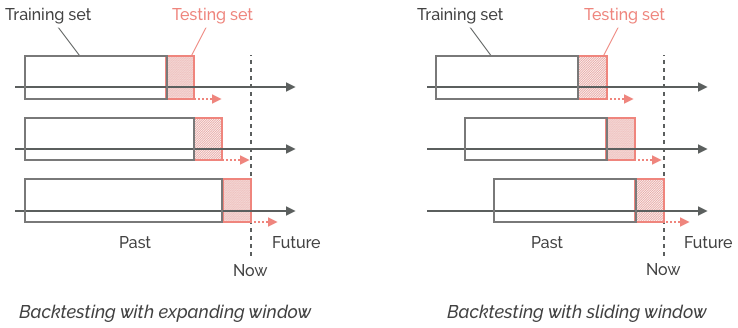

*Fig.1 - Source: Backtesting with a sliding window. DataPred, https://www.datapred.com/blog/the-basics-of-backtesting. Accessed 24 April 2023.*

To learn more about the `atd2022.backtest.Splitter` or the `atd2022.backtest.historical_forecast` procedure, you may refer to the [online documentation](https://algorithms-for-threat-detection.gitlab.io/2022/atd2022/atd2022/atd2022.backtest.html).

However, as a quick primer-- suppose we define a `Splitter` with parameters:
* `window=100`, we require at least 100 training observations
* `num_predict=4`, each time we make a prediction, we predict the next four weeks into the future
* `gap=0`, there are zero weeks between the last training observation and the first forecast query
* `slide=1`, each time we make a prediction, we step forward one week into the future before making our next round of predictions
* `expanding=True`, our training set grows as time goes on by leaving the first training observation as the `0th` week.

Then, `historical_forecast` will operate as follows:
1. Let $k=100$ (Value of `window`)
2. Given $T_{0, k}$, fit your model.
3. Forecast $T_{k+1, k+4}$.
4. Increment, $k \gets k+1$
5. Repeat steps 2-5 until $k+4$ (the last week we forecast) would exceed the number of observations in the dataset.


## `Forecaster` protocol

The `atd2022` library assumes that forecasters adhere to the [`atd2022.forecaster.Forecaster`](https://algorithms-for-threat-detection.gitlab.io/2022/atd2022/atd2022/atd2022.forecasters.types.html#atd2022.forecasters.types.Forecaster) protocol. Intuitively (from the description of `atd2022.backtest.historical_forecast`, it should be clear that your forecaster will need to support `fit`ting a model to the available training data and `predict`ing the next four weeks when requested. Further, you may `__init__`ialize your model as you wish with hyperparameters or static data to support your model's `fit`/`predict` methods. Please refer to the [online documentation](https://algorithms-for-threat-detection.gitlab.io/2022/atd2022/atd2022/atd2022.forecasters.types.html#atd2022.forecasters.types.Forecaster) for more details on the Forecaster protocol.

In [4]:
# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth, window, num_predict, gap, slide, expanding=True
)

# Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.PredictLastForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

# Show first few predictions for each model
for model, result in zip(models, predictions):
    display(model)
    display(result.head())

PredictMeanForecaster():   0%|          | 0/112 [00:00<?, ?it/s]

PredictLastForecaster():   0%|          | 0/112 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/112 [00:00<?, ?it/s]

PredictMeanForecaster()

Region                                     AA                                 \
Event                                      01        02        03         04   
                      Prediction #                                             
2015-11-30/2015-12-06 0              9.920000  3.220000  5.960000  20.230000   
2015-12-07/2015-12-13 1              9.920000  3.220000  5.960000  20.230000   
2015-12-14/2015-12-20 2              9.920000  3.220000  5.960000  20.230000   
2015-12-21/2015-12-27 3              9.920000  3.220000  5.960000  20.230000   
2015-12-07/2015-12-13 0             10.049505  3.257426  6.069307  20.485149   

Region                                                                      \
Event                                     05        06        07        08   
                      Prediction #                                           
2015-11-30/2015-12-06 0             4.340000  3.060000  1.670000  3.370000   
2015-12-07/2015-12-13 1             4.340000  3.060000  1.670000  3.370000   
2015-12-14/2015-12-20 2             4.340000  3.060000  1.670000  3.370000   
2015-12-21/2015-12-27 3             4.340000  3.060000  1.670000  3.370000   
2015-12-07/2015-12-13 0             4.306931  3.029703  1.663366  3.366337   

Region                                                  ...         ZI  \
Event                                     09        10  ...         11   
                      Prediction #                      ...              
2015-11-30/2015-12-06 0             1.120000  0.380000  ...  335.35000   
2015-12-07/2015-12-13 1             1.120000  0.380000  ...  335.35000   
2015-12-14/2015-12-20 2             1.120000  0.380000  ...  335.35000   
2015-12-21/2015-12-27 3             1.120000  0.380000  ...  335.35000   
2015-12-07/2015-12-13 0             1.138614  0.376238  ...  334.70297   

Region                                                                        \
Event                                       12         13        14       15   
                      Prediction #                                             
2015-11-30/2015-12-06 0             101.670000  52.090000  35.26000  6.66000   
2015-12-07/2015-12-13 1             101.670000  52.090000  35.26000  6.66000   
2015-12-14/2015-12-20 2             101.670000  52.090000  35.26000  6.66000   
2015-12-21/2015-12-27 3             101.670000  52.090000  35.26000  6.66000   
2015-12-07/2015-12-13 0             101.673267  52.029703  35.50495  6.70297   

Region                                                                \
Event                                      16          17         18   
                      Prediction #                                     
2015-11-30/2015-12-06 0             40.050000  218.980000  77.030000   
2015-12-07/2015-12-13 1             40.050000  218.980000  77.030000   
2015-12-14/2015-12-20 2             40.050000  218.980000  77.030000   
2015-12-21/2015-12-27 3             40.050000  218.980000  77.030000   
2015-12-07/2015-12-13 0             39.960396  219.188119  76.772277   

Region                                                    
Event                                       19        20  
                      Prediction #                        
2015-11-30/2015-12-06 0             181.220000  0.650000  
2015-12-07/2015-12-13 1             181.220000  0.650000  
2015-12-14/2015-12-20 2             181.220000  0.650000  
2015-12-21/2015-12-27 3             181.220000  0.650000  
2015-12-07/2015-12-13 0             180.782178  0.643564  

[5 rows x 5200 columns]

PredictLastForecaster()

Region                              AA                               ...   ZI  \
Event                               01 02  03  04 05 06 07 08 09 10  ...   11   
                      Prediction #                                   ...        
2015-11-30/2015-12-06 0              9  1  15  18  5  2  2  3  0  0  ...  333   
2015-12-07/2015-12-13 1              9  1  15  18  5  2  2  3  0  0  ...  333   
2015-12-14/2015-12-20 2              9  1  15  18  5  2  2  3  0  0  ...  333   
2015-12-21/2015-12-27 3              9  1  15  18  5  2  2  3  0  0  ...  333   
2015-12-07/2015-12-13 0             23  7  17  46  1  0  1  3  3  0  ...  270   

Region                                                                     
Event                                12  13  14  15  16   17   18   19 20  
                      Prediction #                                         
2015-11-30/2015-12-06 0             132  53  45   5  39  236  103  177  0  
2015-12-07/2015-12-13 1             132  53  45   5  39  236  103  177  0  
2015-12-14/2015-12-20 2             132  53  45   5  39  236  103  177  0  
2015-12-21/2015-12-27 3             132  53  45   5  39  236  103  177  0  
2015-12-07/2015-12-13 0             102  46  60  11  31  240   51  137  0  

[5 rows x 5200 columns]

ExponentiallyWeightedMovingAverage(span=3)

Region                                     AA                                  \
Event                                      01        02         03         04   
                      Prediction #                                              
2015-11-30/2015-12-06 0              8.496837  3.488682   9.421004  18.731328   
2015-12-07/2015-12-13 1              8.496837  3.488682   9.421004  18.731328   
2015-12-14/2015-12-20 2              8.496837  3.488682   9.421004  18.731328   
2015-12-21/2015-12-27 3              8.496837  3.488682   9.421004  18.731328   
2015-12-07/2015-12-13 0             15.748419  5.244341  13.210502  32.365664   

Region                                                                      \
Event                                     05        06        07        08   
                      Prediction #                                           
2015-11-30/2015-12-06 0             5.218359  2.083836  2.213043  1.823549   
2015-12-07/2015-12-13 1             5.218359  2.083836  2.213043  1.823549   
2015-12-14/2015-12-20 2             5.218359  2.083836  2.213043  1.823549   
2015-12-21/2015-12-27 3             5.218359  2.083836  2.213043  1.823549   
2015-12-07/2015-12-13 0             3.109179  1.041918  1.606521  2.411775   

Region                                                  ...          ZI  \
Event                                     09        10  ...          11   
                      Prediction #                      ...               
2015-11-30/2015-12-06 0             1.184225  0.103716  ...  374.941755   
2015-12-07/2015-12-13 1             1.184225  0.103716  ...  374.941755   
2015-12-14/2015-12-20 2             1.184225  0.103716  ...  374.941755   
2015-12-21/2015-12-27 3             1.184225  0.103716  ...  374.941755   
2015-12-07/2015-12-13 0             2.092112  0.051858  ...  322.470878   

Region                                                                \
Event                                       12         13         14   
                      Prediction #                                     
2015-11-30/2015-12-06 0             131.979489  63.837496  46.418698   
2015-12-07/2015-12-13 1             131.979489  63.837496  46.418698   
2015-12-14/2015-12-20 2             131.979489  63.837496  46.418698   
2015-12-21/2015-12-27 3             131.979489  63.837496  46.418698   
2015-12-07/2015-12-13 0             116.989744  54.918748  53.209349   

Region                                                                \
Event                                      15         16          17   
                      Prediction #                                     
2015-11-30/2015-12-06 0              9.558457  36.435986  287.736474   
2015-12-07/2015-12-13 1              9.558457  36.435986  287.736474   
2015-12-14/2015-12-20 2              9.558457  36.435986  287.736474   
2015-12-21/2015-12-27 3              9.558457  36.435986  287.736474   
2015-12-07/2015-12-13 0             10.279228  33.717993  263.868237   

Region                                                                
Event                                       18          19        20  
                      Prediction #                                    
2015-11-30/2015-12-06 0             101.136072  194.187027  0.146037  
2015-12-07/2015-12-13 1             101.136072  194.187027  0.146037  
2015-12-14/2015-12-20 2             101.136072  194.187027  0.146037  
2015-12-21/2015-12-27 3             101.136072  194.187027  0.146037  
2015-12-07/2015-12-13 0              76.068036  165.593513  0.073018  

[5 rows x 5200 columns]

# Plot Ground Truth vs. Predictions

In the below cell, we use a similar visualization as above with the addition of a `step` slider menu.

To provide an intuition for this added slider, let's begin by considering the output of the above predictions. We may note that each prediction dataframe has a `Prediction #` column. Recall that because `num_predict=4` in our splitter, each time we make a prediction we are predicting one, two, three, and four weeks into the future. Thus, `Prediction #` `0, 1, 2, 3` are the 0-indexed labels of predicting `1, 2, 3,` or `4` weeks into the future, respectively.

We can group our predictions dataframe by `Prediction #`  to generate groups of predictions that predict the same number of weeks into the future. Further, we can plot these grouped time series to visualize our predictions at these various levels of future-looking forecasts. The `step` menu lets us select between these grouped-by `Prediction #` timeseries.

**Note:** For the baseline forecasters, you will find varying `step` merely slides the prediction series left-to-right, rather than meaningfully changing anything. This is because the naive forecasters are-- well-- naive, and predict the same value regardless of the number of timesteps into the future they are asked to predict rather than performing any sort of extrapolation or other logic. A performant model that you will build will almost surely not have this property.

In [5]:
# Make a mapping of model names to the model's predictions
timeseries = {repr(model): pred for model, pred in zip(models, predictions)}
atd2022.viz.plot_series_nstep_panel({"Truth": truth}, timeseries)

Row(sizing_mode='stretch_width')
    [0] HSpacer()
    [1] HoloViews(DynamicMap, center=True, height=400, sizing_mode='fixed', widget_location='right', width=650)
    [2] HSpacer()
    [3] WidgetBox(align=('end', 'center'))
        [0] Select(name='Region', options=['Aruba', 'Antigua and Bar...], value='Aruba')
        [1] Select(name='Event', options=['MAKE PUBLIC STATEMENT', ...], value='MAKE PUBLIC STATEMENT')
        [2] DiscreteSlider(formatter='%d', name='Step', options={'0': 0, '1': 1, ...}, value=0)

# Metrics

Metrics allow us to quantify how accurate our predictions are by aggregating all of our forecast errors $e_{t}$ into a single, more interpretable value. A forecast error is simply the difference between our prediction and the actual (or "truth") value. For an *h-step-ahead prediction* on training set $\{y_{1}, y_{2}, \: \dots, y_{k}\}$ and testing set $\{y_{k+1}, y_{k+2}, \: \dots\}$, the forecast error is given by,

$$
e_{k+h} = y_{k+h}- \hat{y}_{k+h|k},
$$

where our prediction is given by $\hat{y}_{k+h|k}$ and the actual value is given by $y_{k+h}$. Generally, forecasts will be evaluated by summing the result of some metric $d$ over the testing set spanning time stamps $t_{k+1}^{w},\: t_{k+2}^{w},\: \dots,\: t_{K}^{w}$ for each window $w \in \{ 1, 2, \: \dots, W \}$ in the backtest. That is, 

$$
\sum_{w=1}^{W}\sum_{i=k+1}^{k+4}d(X_{t_i}, \hat{X}_{w,\: t_i}).
$$
where $\hat{X}_{w,\: t_i}$ are our predictions in window $w$ at time $t_i$.

Forecasters will be evaluated as above using the following metrics. 

**Root Mean Square Error (RMSE)**
Root mean square error is one of the most frequently used metrics given by,

$$
     RMSE = \sqrt{mean\left(\left\{e_{t}^{2} : \forall t\right\}\right)}.
$$

The RMSE is a scale-dependent metric and so only appropriate for comparing forecaster performance on a single time-series. Forecast errors are on the same scale as the time series values they are calculated on; so scale-dependent metrics such as the RMSE tend to be larger for time series containing larger (absolute) values. It is therefore difficult to compare forecaster performance on time series containing values on the order of 10 to time series containing values on the order of 100, for example. Furthermore, the RMSE is more sensitive to large forecast errors than metrics such as the Mean Absolute Error (MAE) since the forecast errors are squared. This metric would be a good choice on forecasting problems where we want to avoid large forecasting errors and where our goal is to optimize the performance of a single forecaster on a single time series or compare the performance of multiple forecasters on a single time series. Lower RMSE values equate to better forecaster performance.

[1. Sktime Mean Squared Error](https://www.sktime.org/en/v0.7.0/api_reference/modules/auto_generated/sktime.performance_metrics.forecasting.MeanSquaredError.html)

**Mean Absolute Scaled Error (MASE)**

The MASE is a scaled (or scale-independent) error and so appropriate for comparing forecaster accuracy on a single time series or between time series. In other words, if our goal is to accurately compare forecaster performance across times series of different Event Root Codes or countries, we need to use scaled metrics. More commonly used scaled metrics such as the Mean Absolute Percentage Error (MAPE) run into issues when there are frequent zeros in the time series and return $\infty$ or `NaN` values. Many of the time series generated from the GDELT data have this property. MASE handles scaling with frequent zeros using the following steps

1. Compute a one-step-ahead predict last forecast (prediction at time $t+1$ is the value at time $t$) on the training set.
2. Compute the Mean Absolute Error (MAE) on these predictions, where,

$$
MAE = mean\left(\left\{|e_{t}| : \forall t\right\}\right)
$$

3. Divide all forecast errors by the MAE computed in step 2 to generate scaled forecast errors      $q_{t}$ where,

$$
     q_{t} = \frac{e_{j}}{\frac{1}{k-1}\sum_{t=2}^{k}|y_{t} - y_{t-1}|}
$$

and $k$ is the number of time stamps in the training set. The errors are rescaled for each backtest split since there is a new training set in each split. Note that the forecast error in the numerator is computed for our predictions in the testing set while the denominator is computed over the training set.

4. Finally, these scaled forecast errors can be used to calculate the Mean Absolute Scaled Error where,

$$
     MASE = mean\left(\left\{|q_{t}| : \forall t\right\}\right).
$$

We can think of the MASE metric as a ratio of the $MAE_{\text{ours}}$ to the $MAE_{\text{predict last}}$, or, how our forecast accuracy compares to the accuracy of the naive predict last forecaster. A `MASE > 1` implies that naive predict last outperformed our forecaster whereas a `MASE < 1` implies that our forecaster outperformed the predict last method. We might be tempted to expect MASE = 1 if our forecaster is also naive predict last; however, this is not necessarily true since the MAE on the training set and testing set are not guaranteed to be the same. The best possible MASE value is 0. Lastly, as a caveat, this metric fails when the training set is flat (all values are the same) because the denominator of the scaled forecast errors will be 0. In this case, the `sktime` implementation we have used will return a large number, but not $\infty$ or `NaN`.


[1. Hyndman, Rob. (2006). Another Look at Forecast Accuracy Metrics for Intermittent Demand. Foresight: The International Journal of Applied Forecasting. 4. 43-46.](https://www.researchgate.net/publication/5055536_Another_Look_at_Forecast_Accuracy_Metrics_for_Intermittent_Demand)

[2. Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on April 22, 2022.](https://otexts.com/fpp3/accuracy.html)

[3. Sktime Mean Absolute Scaled Error](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html#sktime.performance_metrics.forecasting.MeanAbsoluteScaledError)

# Compute macro-average metrics

In this cell, we compute the unweighted average of several metrics. That is, for each `(country, event)` pair, we compute a metric and take the unweighted average across all `(country, event)` pairs. This allows us to generate a concise table showing how well each model performed with respect to each metric.

In [6]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
PredictMeanForecaster(),1.417159,83.399297
PredictLastForecaster(),1.256951,80.691406
ExponentiallyWeightedMovingAverage(span=3),1.149650,72.187592


# Compute n-step metrics

In this cell, we group our predictions by `Prediction #`, compute metrics, and plot the results.

This provides a more detailed view of our models performance, as we can measure how performance changes as the number of predictions into the future increases.

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

MeanAbsoluteScaledError  \
model                                      n                            
ExponentiallyWeightedMovingAverage(span=3) 0                 0.973619   
                                           1                 1.146102   
                                           2                 1.219915   
                                           3                 1.258965   
PredictLastForecaster()                    0                 1.031244   
                                           1                 1.259053   
                                           2                 1.350803   
                                           3                 1.386703   
PredictMeanForecaster()                    0                 1.417868   
                                           1                 1.417793   
                                           2                 1.415908   
                                           3                 1.417067   

                                              MeanSquaredError  
model                                      n                    
ExponentiallyWeightedMovingAverage(span=3) 0         61.947120  
                                           1         71.947654  
                                           2         75.795944  
                                           3         77.777505  
PredictLastForecaster()                    0         66.299545  
                                           1         80.667854  
                                           2         85.746636  
                                           3         87.823300  
PredictMeanForecaster()                    0         83.359042  
                                           1         83.375880  
                                           2         83.331682  
                                           3         83.473647

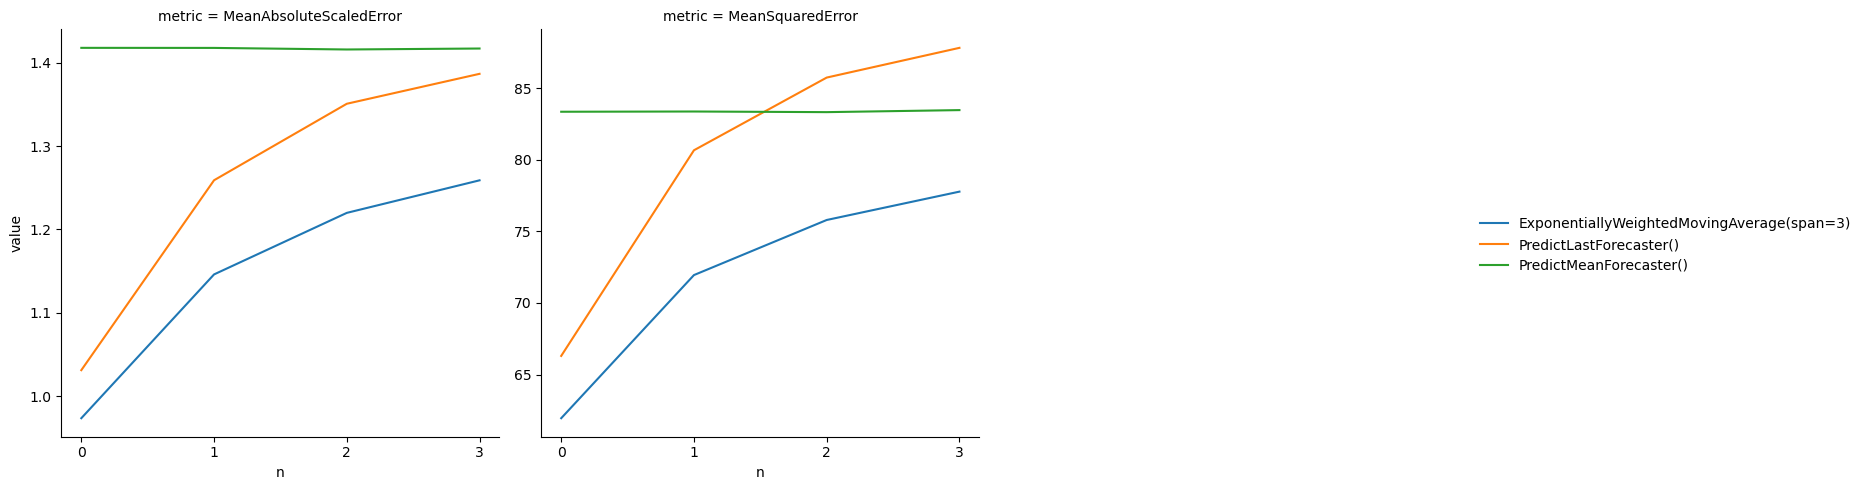

In [7]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

# Compute column-wise metrics

In this cell, we compute the metric score for each `(country, event)` pair and (unlike the macro-average cell above), we leave the metric results un-aggregated.

This view of the data can be useful for identifying problematic `(country, event)` series through additional analysis.

In [8]:
metric_functions = [
    MeanAbsoluteScaledError(multioutput="raw_values"),
    MeanSquaredError(square_root=True, multioutput="raw_values"),
]

atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    columnwise=True,
    verbose=True,
)

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

AA  \
                                                                01   
                                           MeanAbsoluteScaledError   
PredictMeanForecaster()                                   0.743739   
PredictLastForecaster()                                   1.037790   
ExponentiallyWeightedMovingAverage(span=3)                0.911961   

                                                             \
                                                              
                                           MeanSquaredError   
PredictMeanForecaster()                            7.281599   
PredictLastForecaster()                            9.801831   
ExponentiallyWeightedMovingAverage(span=3)         8.434841   

                                                                    \
                                                                02   
                                           MeanAbsoluteScaledError   
PredictMeanForecaster()                                   0.834998   
PredictLastForecaster()                                   1.217575   
ExponentiallyWeightedMovingAverage(span=3)                0.999016   

                                                             \
                                                              
                                           MeanSquaredError   
PredictMeanForecaster()                            4.541444   
PredictLastForecaster()                            6.324026   
ExponentiallyWeightedMovingAverage(span=3)         5.119813   

                                                                    \
                                                                03   
                                           MeanAbsoluteScaledError   
PredictMeanForecaster()                                   0.814219   
PredictLastForecaster()                                   1.061937   
ExponentiallyWeightedMovingAverage(span=3)                0.917807   

                                                             \
                                                              
                                           MeanSquaredError   
PredictMeanForecaster()                            6.549704   
PredictLastForecaster()                            7.989111   
ExponentiallyWeightedMovingAverage(span=3)         6.768270   

                                                                    \
                                                                04   
                                           MeanAbsoluteScaledError   
PredictMeanForecaster()                                   0.850037   
PredictLastForecaster()                                   1.230354   
ExponentiallyWeightedMovingAverage(span=3)                1.041195   

                                                             \
                                                              
                                           MeanSquaredError   
PredictMeanForecaster()                           30.147366   
PredictLastForecaster()                           40.769085   
ExponentiallyWeightedMovingAverage(span=3)        33.822479   

                                                                    \
                                                                05   
                                           MeanAbsoluteScaledError   
PredictMeanForecaster()                                   0.759841   
PredictLastForecaster()                                   1.013353   
ExponentiallyWeightedMovingAverage(span=3)                0.844288   

                                                             ...  \
                                                             ...   
                                           MeanSquaredError  ...   
PredictMeanForecaster()                            4.351805  ...   
PredictLastForecaster()                            5.833248  ...   
ExponentiallyWeightedMovingAverage(span=3)         4.824540  ...   

                                  

# That's a lot of metrics! ...but how will the **best** model be evaluated?

Excellent question!

In the past, ATD challenge administrators have unilaterally selected a single metric to use as the challenge evaluation criteria (e.g., in `atd2020` and `atd2021`, a macro-average of `F1` scores).

In this challenge, we will do things a little differently.

Over the coming weeks, we want to hear **from you**. What does your team think is the most robust way to unambiguously measure "the best" forecaster on this very challenging problem?

Challenge administrators will gather your feedback along with a few options we've already identified as reasonable choices (e.g., macro-average MASE, a neat ranked-choice voting inspired method consisting of multiple metrics, etc.) and we will conduct a poll **voted on by you and your peers** to determine the exact means by which a winner of this year's challenge will be determined.

# Good luck in this year's Algorithms for Threat Detection challenge!